In [64]:
from os import path, makedirs

import pandas as pd
from cv2 import imread
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import save_img

from keras.utils import image_dataset_from_directory

In [16]:
datasets_directory = '/Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/MSc/Modules/COMP8260_AI_Systems_Implementation/Project/datasets/'
#dataset_directory = path.join(datasets_directory, 'archive/')
dataset_directory = path.join(datasets_directory, 'binary_classification/')

In [73]:
def load_images(a_directory_name, the_labels):
    return image_dataset_from_directory(
    directory=path.join(dataset_directory, a_directory_name),
    labels=the_labels,
    label_mode="binary",
    color_mode="grayscale",
    batch_size=None,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False
)

In [81]:
dataset_names = ['train', 'test', 'valid']

labels_file_path = path.join(dataset_directory + 'valid' + '/labels/labels.csv')
df = pd.read_csv(labels_file_path)

#train_ds= load_images('train')
valid_ds = load_images('valid', list(df['target'].values))
#test_ds = load_images('test')

Found 348 files belonging to 2 classes.


In [83]:
print(f"Number of training samples: {train_ds.cardinality()}")
print(f"Number of validation samples: {valid_ds.cardinality()}")
print(f"Number of test samples: {test_ds.cardinality()}")

Number of training samples: 3631
Number of validation samples: 348
Number of test samples: 169


2024-03-07 14:38:47.546104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


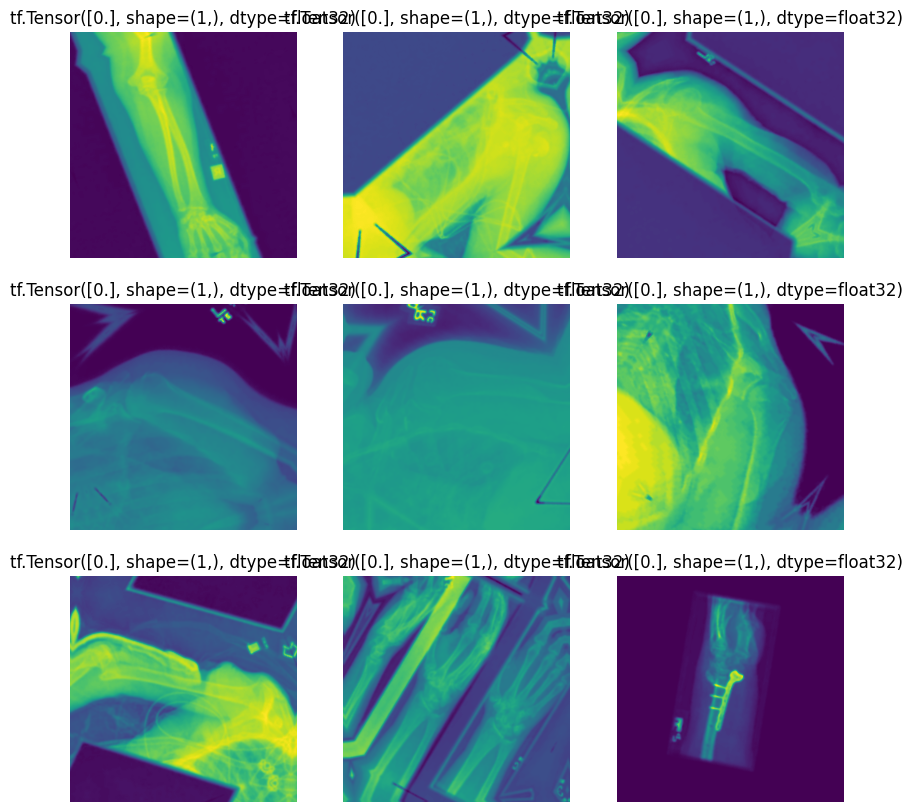

In [61]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    label_1 = label
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(label)
    plt.axis("off")

In [84]:
def data_augmentation(image):
    for layer in augmentation_layers:
        image = layer(image)
    return image

In [104]:
augmentation_layers = [layers.RandomFlip("horizontal"), layers.RandomRotation(0.1)]
number_of_Augmentations = 2

#create the directories if they do not exist
image_directory = path.join(dataset_directory + 'augmented_binary_dataset/' + 'valid/images')
label_directory = path.join(dataset_directory + 'augmented_binary_dataset/' + 'valid/labels')
labels_file_path = label_directory + '/labels'
if path.exists(image_directory) == False:  
    makedirs(image_directory) 
if path.exists(label_directory) == False:  
    makedirs(label_directory) 

file_name_index = 1
labels =[]
for image, label in valid_ds:
    for augmentation_count in range(number_of_Augmentations):
        filename = str(file_name_index) + '_augmentation_' + str(augmentation_count) + '.png'
        labels.append(label)
        augmented_image = data_augmentation(image)
        #write the augmented image to file
        image_file_path = image_directory+ '/' + filename
        save_img(image_file_path, augmented_image)       
    file_name_index = file_name_index +1

#write the labels to a file
labels = [str(int(label.numpy()[0])) for label in labels]
labels_file = open(labels_file_path, 'w')
labels_file.write(''.join(labels))
labels_file.close()

In [102]:
labels =[]
for image, label in valid_ds:
    labels.append(label)
labels = [str(int(label.numpy()[0])) for label in labels]
labels

['0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0'

In [57]:


a_label.numpy()[1]

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
import os
import Augmentor
from PIL import Image

def augment_images(input_folder, output_folder, num_augmented_images):
    # Initialize an Augmentor pipeline for image augmentation
    pipeline = Augmentor.Pipeline(input_folder, output_folder)

    # Define augmentation operations (you can customize these based on your requirements)
    pipeline.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    pipeline.flip_left_right(probability=0.5)
    pipeline.flip_top_bottom(probability=0.5)

    # Number of augmented images to generate per original image
    pipeline.sample(num_augmented_images)

def main():
    # Path to the input folder containing original images
    input_folder = "path/to/original_images"

    # Path to the output folder where augmented images will be saved
    output_folder = "path/to/augmented_images"

    # Number of augmented images to generate per original image
    num_augmented_images = 5

    # Ensure output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Perform image augmentation
    augment_images(input_folder, output_folder, num_augmented_images)

if __name__ == "__main__":
    main()
